In [1]:
import numpy as np
import pandas as pd
import sklearn

In [2]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [3]:
match

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma


In [4]:
delivery

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [5]:
delivery['over'] = delivery['over'] + 1

In [6]:
delivery

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,11,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,11,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [7]:
total_score_df = delivery.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()

In [8]:
total_score_df

,match_id,inning,total_runs
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129
...,...,...,...
2212,1426310,2,174
2213,1426311,1,175
2214,1426311,2,139
2215,1426312,1,113


In [9]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [10]:
match = match.drop('match_type', axis = 1)

In [11]:
match

,id,season,city,date,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma


In [12]:
match = match.rename(columns = {'method' : 'dl_applied'})

In [13]:
match['dl_applied'] = match['dl_applied'].fillna(0).replace('D/L', 1)

/var/folders/9y/p18h6kys5qj6bwkj269xldz40000gn/T/ipykernel_52260/1476115948.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  match['dl_applied'] = match['dl_applied'].fillna(0).replace('D/L', 1)


In [14]:
match

,id,season,city,date,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,dl_applied,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,0,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,0,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,0,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,0,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,0,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,0,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,0,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,0,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,0,Nitin Menon,VK Sharma


In [15]:
match_df = match.merge(total_score_df[['match_id', 'total_runs']], left_on = 'id', right_on = 'match_id')

In [16]:
match_df

,id,season,city,date,player_of_match,venue,team1,team2,toss_winner,toss_decision,...,result,result_margin,target_runs,target_overs,super_over,dl_applied,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,runs,140.0,223.0,20.0,N,0,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,...,runs,33.0,241.0,20.0,N,0,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,...,wickets,9.0,130.0,20.0,N,0,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,...,wickets,5.0,166.0,20.0,N,0,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,...,wickets,5.0,111.0,20.0,N,0,BF Bowden,K Hariharan,335986,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,...,wickets,4.0,215.0,20.0,N,0,Nitin Menon,VK Sharma,1426307,214
1091,1426309,2024,Ahmedabad,2024-05-21,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,...,wickets,8.0,160.0,20.0,N,0,AK Chaudhary,R Pandit,1426309,159
1092,1426310,2024,Ahmedabad,2024-05-22,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,...,wickets,4.0,173.0,20.0,N,0,KN Ananthapadmanabhan,MV Saidharshan Kumar,1426310,172
1093,1426311,2024,Chennai,2024-05-24,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,...,runs,36.0,176.0,20.0,N,0,Nitin Menon,VK Sharma,1426311,175


In [17]:
match_df["team1"].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [18]:
teams = [
    'Mumbai Indians', 
    'Kolkata Knight Riders',
    'Rajasthan Royals', 
    'Chennai Super Kings',
    'Sunrisers Hyderabad',
    'Delhi Capitals', 
    'Punjab Kings',
    'Lucknow Super Giants', 
    'Gujarat Titans',
    'Royal Challengers Bengaluru'
]

In [19]:
match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

In [20]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')

In [21]:
match_df['team1'] = match_df['team1'].str.replace('Royal Challengers Bangalore', 'Royal Challengers Bengaluru')
match_df['team2'] = match_df['team2'].str.replace('Royal Challengers Bangalore', 'Royal Challengers Bengaluru')

In [22]:
match_df['team1'] = match_df['team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
match_df['team2'] = match_df['team2'].str.replace('Kings XI Punjab', 'Punjab Kings')

In [23]:
match_df=match_df[match_df['dl_applied']==0]

In [24]:
match_df.shape

(1074, 21)

In [25]:
match_df=match_df[['match_id','city','winner','total_runs']]

In [26]:
delivery_df=match_df.merge(delivery,on='match_id')

In [27]:
delivery_df=delivery_df[delivery_df['inning']==2]

In [28]:
delivery_df.shape

(124387, 20)

In [29]:
delivery_df['current_score']=delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [30]:
delivery_df['runs_left']=delivery_df['total_runs_x']-delivery_df['current_score']

In [31]:
delivery_df['balls_left']=120-(delivery_df['over']*6 + delivery_df['ball'])

In [32]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,1,R Dravid,...,0,1,NaN,0,NaN,NaN,NaN,1,221,113
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,2,W Jaffer,...,1,1,wides,0,NaN,NaN,NaN,2,220,112
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,3,W Jaffer,...,0,0,NaN,0,NaN,NaN,NaN,2,220,111
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,4,W Jaffer,...,0,1,NaN,0,NaN,NaN,NaN,3,219,110
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,5,R Dravid,...,0,1,NaN,0,NaN,NaN,NaN,4,218,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257269,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,5,SS Iyer,...,0,1,NaN,0,NaN,NaN,NaN,110,3,55
257270,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,6,VR Iyer,...,0,1,NaN,0,NaN,NaN,NaN,111,2,54
257271,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,11,1,VR Iyer,...,0,1,NaN,0,NaN,NaN,NaN,112,1,53
257272,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,11,2,SS Iyer,...,0,1,NaN,0,NaN,NaN,NaN,113,0,52


In [33]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values
delivery_df['wickets'] = 10 - wickets
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,1,R Dravid,...,1,NaN,0,0,NaN,NaN,1,221,113,10
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,2,W Jaffer,...,1,wides,0,0,NaN,NaN,2,220,112,10
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,3,W Jaffer,...,0,NaN,0,0,NaN,NaN,2,220,111,10
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,4,W Jaffer,...,1,NaN,0,0,NaN,NaN,3,219,110,10
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,5,R Dravid,...,1,NaN,0,0,NaN,NaN,4,218,109,10


In [34]:
delivery_df.tail()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
257269,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,5,SS Iyer,...,1,NaN,0,0,NaN,NaN,110,3,55,8
257270,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,6,VR Iyer,...,1,NaN,0,0,NaN,NaN,111,2,54,8
257271,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,11,1,VR Iyer,...,1,NaN,0,0,NaN,NaN,112,1,53,8
257272,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,11,2,SS Iyer,...,1,NaN,0,0,NaN,NaN,113,0,52,8
257273,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,11,3,VR Iyer,...,1,NaN,0,0,NaN,NaN,114,-1,51,8


In [35]:
# crr = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [36]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [37]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [38]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [39]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [40]:
final_df = final_df.sample(final_df.shape[0])

In [41]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
204752,Kolkata Knight Riders,Chennai Super Kings,Dubai,131,68,10,192,7.038462,11.558824,0


In [42]:
final_df.dropna(inplace=True)

In [43]:
final_df = final_df[final_df['balls_left'] != 0]

In [44]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [45]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
22278,Deccan Chargers,Delhi Daredevils,Durban,124,79,8,173,7.170732,9.417722
237923,Punjab Kings,Delhi Capitals,Dharamsala,84,22,7,213,7.897959,22.909091
53070,Royal Challengers Bangalore,Rajasthan Royals,Jaipur,136,107,10,146,4.615385,7.626168
434,Kings XI Punjab,Chennai Super Kings,Chandigarh,88,31,8,240,10.247191,17.032258
155917,Kolkata Knight Riders,Mumbai Indians,Mumbai,179,108,10,181,1.000000,9.944444
...,...,...,...,...,...,...,...,...,...
71373,Kings XI Punjab,Deccan Chargers,Chandigarh,2,-4,4,190,9.096774,-3.000000
143048,Rising Pune Supergiant,Gujarat Lions,Pune,43,17,6,161,6.873786,15.176471
12016,Chennai Super Kings,Deccan Chargers,Hyderabad,32,22,7,147,7.040816,8.727273
96664,Kolkata Knight Riders,Kings XI Punjab,Abu Dhabi,100,64,7,132,3.428571,9.375000


In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([('trf',OneHotEncoder(sparse_output=False,drop='first'),['batting_team','bowling_team','city'])]
                        ,remainder='passthrough')

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [48]:
pipe = Pipeline(steps=[('step1',trf),('step2',LogisticRegression(solver='liblinear'))])

In [49]:
pipe.fit(X_train,y_train)

/Users/manas/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [50]:
y_pred = pipe.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8076547300454526

In [52]:
pipe.predict_proba(X_test)[10]

array([9.99906836e-01, 9.31642372e-05])

In [53]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))

In [54]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [55]:
temp_df,target = match_progression(delivery_df,1426290,pipe)
temp_df

Target- 147


,end_of_over,runs_after_over,wickets_in_over,lose,win
252742,1,14,0,5.0,95.0
252748,2,20,0,1.7,98.3
252754,3,12,0,1.2,98.8
252760,4,18,0,0.5,99.5
252766,5,14,0,0.3,99.7
252772,6,14,1,0.3,99.7
252778,7,8,1,0.6,99.4
252784,8,7,1,1.0,99.0
252791,9,1,1,2.5,97.5
252797,10,4,1,5.2,94.8


Text(0.5, 1.0, 'Target=147')

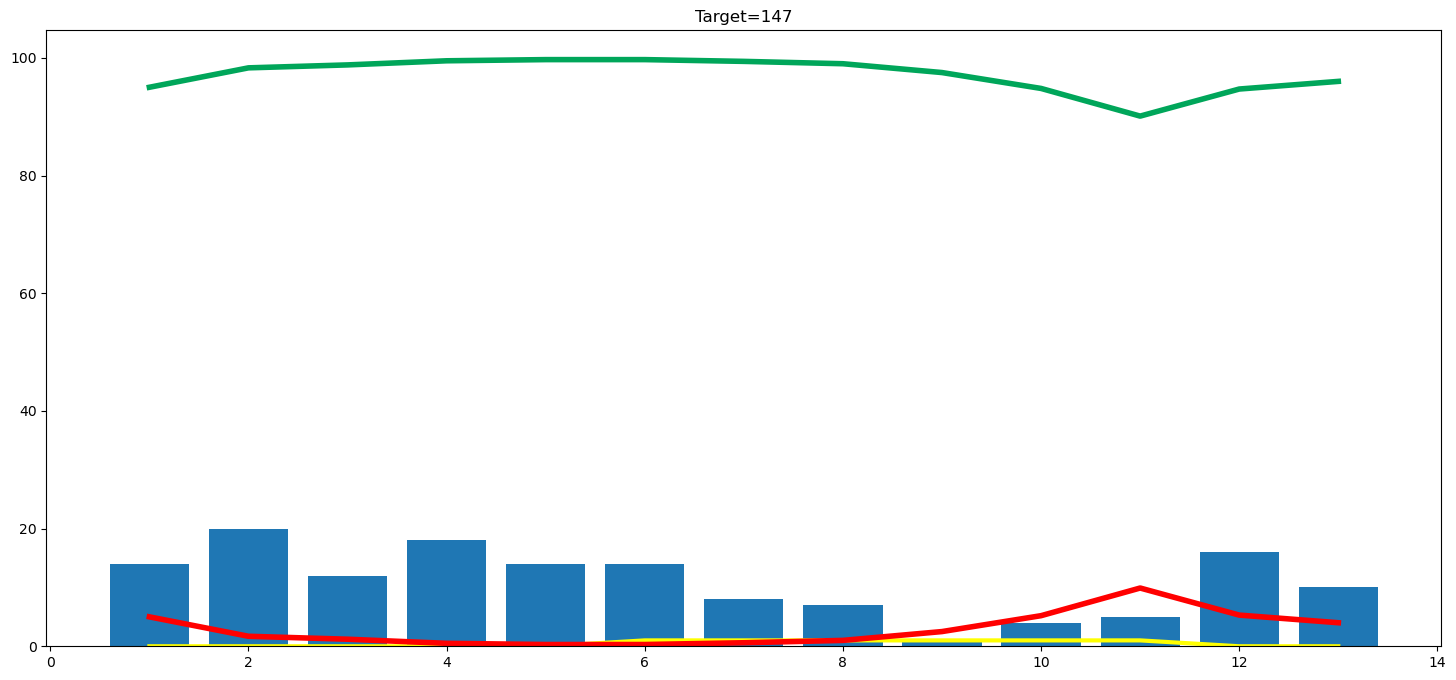

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target=' + str(target))

In [57]:
teams

['Mumbai Indians',
 'Kolkata Knight Riders',
 'Rajasthan Royals',
 'Chennai Super Kings',
 'Sunrisers Hyderabad',
 'Delhi Capitals',
 'Punjab Kings',
 'Lucknow Super Giants',
 'Gujarat Titans',
 'Royal Challengers Bengaluru']

In [58]:
delivery_df['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', nan, 'Rajkot', 'Kanpur', 'Bengaluru', 'Dubai',
       'Sharjah', 'Navi Mumbai', 'Lucknow', 'Guwahati', 'Mohali'],
      dtype=object)

In [59]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

In [60]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# After making predictions
y_pred = pipe.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80     11221
           1       0.81      0.82      0.82     12320

    accuracy                           0.81     23541
   macro avg       0.81      0.81      0.81     23541
weighted avg       0.81      0.81      0.81     23541

Confusion Matrix:
[[ 8920  2301]
 [ 2227 10093]]
